# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city_city = []
city_lat = []
city_lng = []
city_max = []
city_temp = []
city_humidity = []
city_cloudiness = []
city_windspeed = []
city_country = []
city_date = []

count = 0
set = 1
print("Beginning Data Retrieval")

#Make a request for each of the cities
for x in range(10):
#for x in range(len(cities)):
        count = count + 1
   
        if count <= 50:
            print(f"Processing Weather Record: {x} of Set {set} | {cities[x]}")
            query_url = f"{url}appid={weather_api_key}&q={cities[x]}"
            response = requests.get(query_url).json()
                
            try:     
                #lat = weather_json["coord"]["lat"]
                city_city.append(response["name"])
                city_lat.append(response["coord"]["lat"])
                city_lng.append(response["coord"]["lon"])
                city_max.append(response["main"]["temp_max"])
                city_temp.append(response["main"]["temp"])
                city_humidity.append(response["main"]["humidity"])
                city_cloudiness.append(response["clouds"]["all"])
                city_windspeed.append(response["wind"]["speed"])
                city_country.append(response["sys"]["country"])
                city_date.append(response["dt"])     
                print(f"City {cities[x]} found! Appending response")
            except:
                print(f"City {cities[x]} was not found! Skipping...")
                pass
        
        else:
            count = 0
            set = set + 1
            time.sleep(50)

Beginning Data Retrieval
Processing Weather Record: 0 of Set 1 | butaritari
City butaritari found! Appending response
Processing Weather Record: 1 of Set 1 | andreyevka
City andreyevka found! Appending response
Processing Weather Record: 2 of Set 1 | lompoc
City lompoc found! Appending response
Processing Weather Record: 3 of Set 1 | dikson
City dikson found! Appending response
Processing Weather Record: 4 of Set 1 | cherskiy
City cherskiy found! Appending response
Processing Weather Record: 5 of Set 1 | karamken
City karamken was not found! Skipping...
Processing Weather Record: 6 of Set 1 | rikitea
City rikitea found! Appending response
Processing Weather Record: 7 of Set 1 | batagay
City batagay found! Appending response
Processing Weather Record: 8 of Set 1 | punta arenas
City punta arenas found! Appending response
Processing Weather Record: 9 of Set 1 | coquimbo
City coquimbo found! Appending response


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a data frame from cities
weather_dict = {
   "City": city_city,
    "Lat": city_lat,
    "Lng": city_lng,
    "Max temp": city_max,
    "Temp": city_temp,
    "Humidity": city_humidity,
    "Cloudiness": city_cloudiness,
    "Windspeed": city_windspeed,
    "Country": city_country,
    "Date": city_date    
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Lat,Lng,Max temp,Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,Butaritari,3.0707,172.7902,300.93,300.93,76,79,5.01,KI,1639606038
1,Andreyevka,55.9803,37.1350,271.93,271.77,86,40,5.00,RU,1639606038
2,Lompoc,34.6391,-120.4579,288.46,286.13,59,1,4.63,US,1639606038
3,Dikson,73.5069,80.5464,242.57,242.57,100,99,2.13,RU,1639606038
4,Cherskiy,68.7500,161.3000,241.19,241.19,80,80,1.99,RU,1639606038


In [6]:
weather_data.to_csv("../../output_data/weather_data.csv",
                  encoding="utf-8", index=False, header=True)

In [7]:
weather_data.head()

,City,Lat,Lng,Max temp,Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,Butaritari,3.0707,172.7902,300.93,300.93,76,79,5.01,KI,1639606038
1,Andreyevka,55.9803,37.1350,271.93,271.77,86,40,5.00,RU,1639606038
2,Lompoc,34.6391,-120.4579,288.46,286.13,59,1,4.63,US,1639606038
3,Dikson,73.5069,80.5464,242.57,242.57,100,99,2.13,RU,1639606038
4,Cherskiy,68.7500,161.3000,241.19,241.19,80,80,1.99,RU,1639606038


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [8]:
weather_data.describe()

,Lat,Lng,Max temp,Temp,Humidity,Cloudiness,Windspeed,Date
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000e+00
mean,21.928522,20.968611,272.731111,272.454444,78.333333,62.888889,4.011111,1.639606e+09
std,48.703325,122.859541,26.428906,26.266952,14.115594,38.325724,2.491904,1.031626e+02
min,-53.150000,-134.969200,234.280000,234.280000,59.000000,1.000000,1.060000,1.639606e+09
25%,-23.120300,-71.343600,242.570000,242.570000,72.000000,40.000000,2.130000,1.639606e+09
50%,34.639100,37.135000,285.990000,285.990000,76.000000,80.000000,3.880000,1.639606e+09
75%,67.633300,134.633300,290.870000,290.870000,86.000000,87.000000,5.000000,1.639606e+09
max,73.506900,172.790200,300.930000,300.930000,100.000000,99.000000,9.470000,1.639606e+09


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.
index =  weather_data[weather_data['Humidity'] >= 100].index
index

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_data.drop(index,inplace=False)

In [ ]:
clean_city_data.describe()

In [ ]:
clean_city_data

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


,City,Lat,Lng,Max temp,Temp,Humidity,Cloudiness,Windspeed,Country,Date
1,Hong Kong,22.2855,114.1577,296.58,295.76,82,96,2.24,HK,1639568548
2,Fortuna,40.5982,-124.1573,279.63,278.19,87,90,4.02,US,1639568570
3,Nizhnyaya Poyma,56.1622,97.1933,248.11,248.11,99,60,1.46,RU,1639568570
4,Inírida,3.8653,-67.9239,297.15,297.15,97,100,0.31,CO,1639568570
5,Khuzdar,27.7384,66.6434,285.64,285.64,9,0,6.19,PK,1639568570
6,São José da Coroa Grande,-8.8978,-35.1478,301.22,301.22,67,99,4.69,BR,1639568571
7,Jamestown,42.0970,-79.2353,279.92,278.47,59,90,2.24,US,1639568571
8,Waiuku,-37.2500,174.7500,292.73,291.09,86,2,2.51,NZ,1639568440
9,Bethel,41.3712,-73.4140,276.03,271.80,78,1,0.00,US,1639568571


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

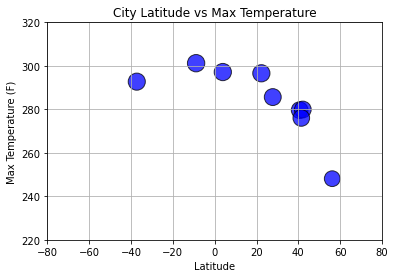

In [11]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], clean_city_data["Max temp"], marker="o", facecolors="blue", edgecolors="black", s=clean_city_data["Max temp"], alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-80, 80)
plt.ylim(220, 320)

# Save the figure
plt.savefig("MaxTempInWorldCities.png")

# Show plot
plt.show()

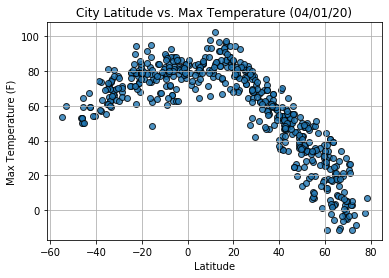

## Latitude vs. Humidity Plot

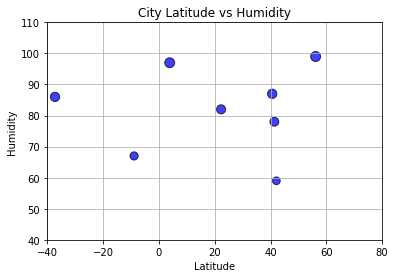

In [12]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], marker="o", facecolors="blue", edgecolors="black", s=clean_city_data["Humidity"], alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
plt.xlim(-40, 80)
plt.ylim(40, 110)

# Save the figure
plt.savefig("LatHumidityWorldCities.png")

# Show plot
plt.show()

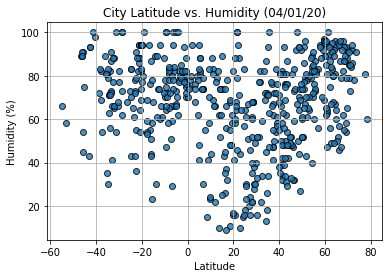

## Latitude vs. Cloudiness Plot

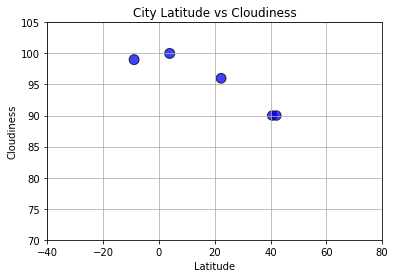

In [14]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], marker="o", facecolors="blue", edgecolors="black", s=clean_city_data["Cloudiness"], alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-40, 80)
plt.ylim(70, 105)

# Save the figure
plt.savefig("LatCloudinessInWorldCities.png")

# Show plot
plt.show()

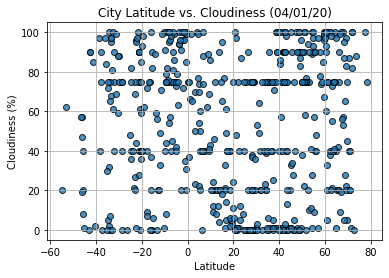

## Latitude vs. Wind Speed Plot

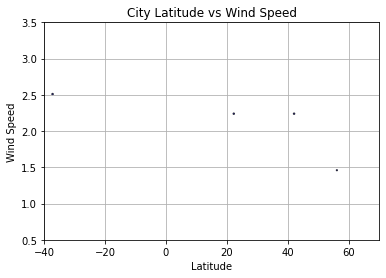

In [15]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], clean_city_data["Windspeed"], marker="o", facecolors="blue", edgecolors="black", s=clean_city_data["Windspeed"], alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-40, 70)
plt.ylim(0.5, 3.5)


# Save the figure
plt.savefig("LatWindSpeedInWorldCities.png")

# Show plot
plt.show()

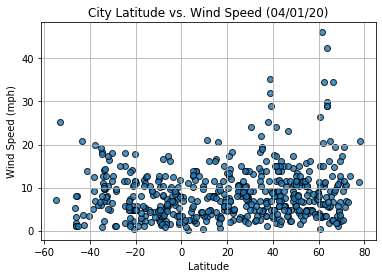

## Linear Regression

In [16]:
# Northern Hemisphere (greater than or equal to 0 degrees latitude)
nh_df = clean_city_data.loc[(clean_city_data['Lat'] >= 0),:]
nh_df

,City,Lat,Lng,Max temp,Temp,Humidity,Cloudiness,Windspeed,Country,Date
1,Hong Kong,22.2855,114.1577,296.58,295.76,82,96,2.24,HK,1639568548
2,Fortuna,40.5982,-124.1573,279.63,278.19,87,90,4.02,US,1639568570
3,Nizhnyaya Poyma,56.1622,97.1933,248.11,248.11,99,60,1.46,RU,1639568570
4,Inírida,3.8653,-67.9239,297.15,297.15,97,100,0.31,CO,1639568570
5,Khuzdar,27.7384,66.6434,285.64,285.64,9,0,6.19,PK,1639568570
7,Jamestown,42.0970,-79.2353,279.92,278.47,59,90,2.24,US,1639568571
9,Bethel,41.3712,-73.4140,276.03,271.80,78,1,0.00,US,1639568571


In [17]:
# Southern Hemisphere (less than 0 degrees latitude):
sh_df = clean_city_data.loc[(clean_city_data['Lat'] <= 0),:]
sh_df

,City,Lat,Lng,Max temp,Temp,Humidity,Cloudiness,Windspeed,Country,Date
6,São José da Coroa Grande,-8.8978,-35.1478,301.22,301.22,67,99,4.69,BR,1639568571
8,Waiuku,-37.2500,174.7500,292.73,291.09,86,2,2.51,NZ,1639568440


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

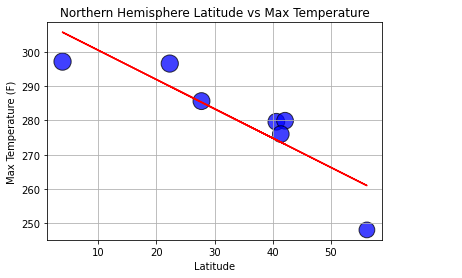

The r-squared is: 0.7764524550893608


In [18]:
# Northern Hemisphere (greater than or equal to 0 degrees latitude)
x = nh_df['Lat']
y = nh_df["Max temp"]

# Build a scatter plot for each data type
plt.scatter(x,y, marker="o", facecolors="blue", edgecolors="black", s=nh_df["Max temp"], alpha=0.75)


# Incorporate the other graph properties
plt.title("Northern Hemisphere Latitude vs Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(45,240),fontsize=15,color="red")

plt.xlim(0,60)
plt.ylim(230,320)

# Show plot
plt.show()
print(f"The r-squared is: {rvalue**2}")


In [19]:
correlation = st.pearsonr(x,y)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.88


The r-value is: 0.46937863826630627


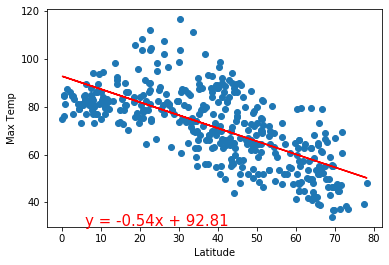

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

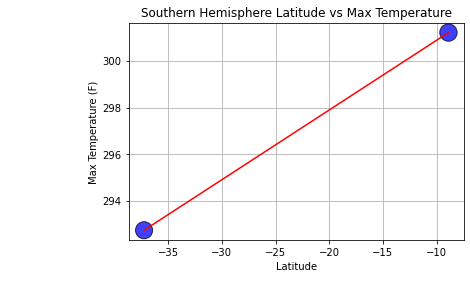

The r-squared is: 1.0


In [20]:
# Southern Hemisphere (greater than or equal to 0 degrees latitude)
x = sh_df['Lat']
y = sh_df["Max temp"]

# Build a scatter plot for each data type
plt.scatter(x,y, marker="o", facecolors="blue", edgecolors="black", s=sh_df["Max temp"], alpha=0.75)



# Incorporate the other graph properties
plt.title("Southern Hemisphere Latitude vs Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-50,290),fontsize=15,color="red")

plt.xlim(-40,-5)
plt.ylim(280,320)

# Show plot
plt.show()
print(f"The r-squared is: {rvalue**2}")


In [21]:
correlation = st.pearsonr(x,y)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 1.0


The r-value is: 0.6082708688906918


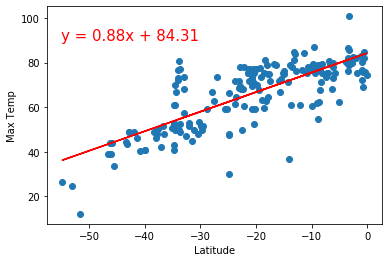

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

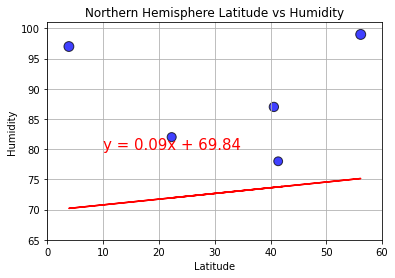

The r-squared is: 0.0026541735254585366


In [66]:
# Northern Hemisphere (greater than or equal to 0 degrees latitude)
x = nh_df['Lat']
y = nh_df["Humidity"]

# Build a scatter plot for each data type
plt.scatter(x,y, marker="o", facecolors="blue", edgecolors="black", s=nh_df["Humidity"], alpha=0.75)

# Incorporate the other graph properties
plt.title("Northern Hemisphere Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(10,80),fontsize=15,color="red")

plt.xlim(0,60)
plt.ylim(65,101)

# Show plot
plt.show()
print(f"The r-squared is: {rvalue**2}")


In [28]:
correlation = st.pearsonr(x,y)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.05


The r-value is: 0.000543987878808455


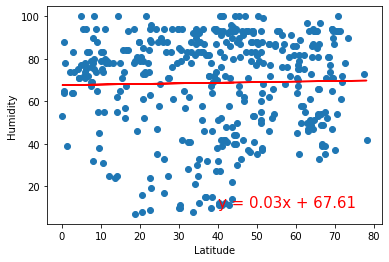

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

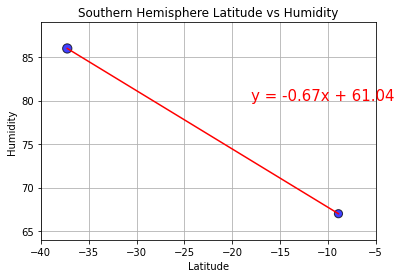

The r-squared is: 1.0


In [37]:
# Southern Hemisphere (greater than or equal to 0 degrees latitude)
x = sh_df['Lat']
y = sh_df["Humidity"]

# Build a scatter plot for each data type
plt.scatter(x,y, marker="o", facecolors="blue", edgecolors="black", s=sh_df["Humidity"], alpha=0.75)

# Incorporate the other graph properties
plt.title("Southern Hemisphere Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.grid(True)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-18,80),fontsize=15,color="red")

plt.xlim(-40,-5)
plt.ylim(64, 89)

# Show plot
plt.show()
print(f"The r-squared is: {rvalue**2}")


In [38]:
correlation = st.pearsonr(x,y)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -1.0


The r-value is: 0.014985174297345524


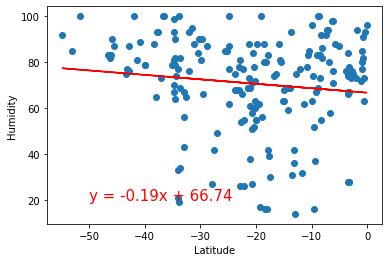

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

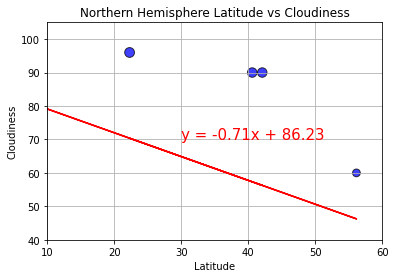

The r-squared is: 0.07494699192312042


In [64]:
# Northern Hemisphere (greater than or equal to 0 degrees latitude)
x = nh_df['Lat']
y = nh_df["Cloudiness"]

# Build a scatter plot for each data type
plt.scatter(x,y, marker="o", facecolors="blue", edgecolors="black", s=nh_df["Cloudiness"], alpha=0.75)

# Incorporate the other graph properties
plt.title("Northern Hemisphere Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.grid(True)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(30,70),fontsize=15,color="red")

plt.xlim(5,60)
plt.ylim(40,105)

# Show plot
plt.show()
print(f"The r-squared is: {rvalue**2}")


In [43]:
correlation = st.pearsonr(x,y)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.27


The r-value is: 0.0020898727664228514


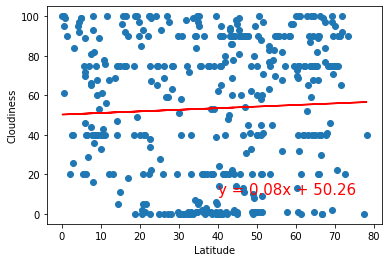

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

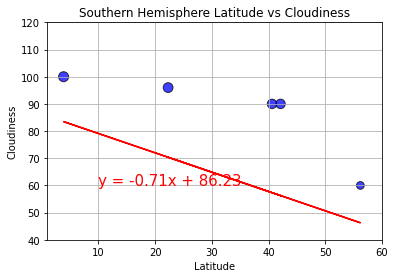

The r-squared is: 0.07494699192312042


In [47]:
# Southern Hemisphere (greater than or equal to 0 degrees latitude)
x = nh_df['Lat']
y = nh_df["Cloudiness"]

# Build a scatter plot for each data type
plt.scatter(x,y, marker="o", facecolors="blue", edgecolors="black", s=nh_df["Cloudiness"], alpha=0.75)

# Incorporate the other graph properties
plt.title("Southern Hemisphere Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.grid(True)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(10,60),fontsize=15,color="red")

plt.xlim(1,60)
plt.ylim(40,110)

# Show plot
plt.show()
print(f"The r-squared is: {rvalue**2}")


In [48]:
correlation = st.pearsonr(x,y)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.27


The r-value is: 0.0035263772085582894


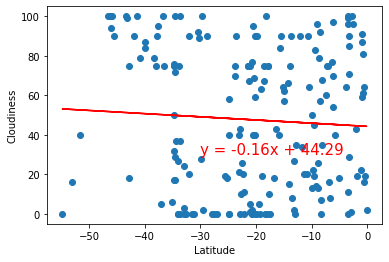

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

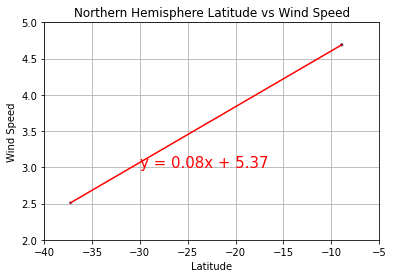

The r-squared is: 1.0


In [61]:
# Northern Hemisphere (greater than or equal to 0 degrees latitude)
x = sh_df['Lat']
y = sh_df["Windspeed"]

# Build a scatter plot for each data type
plt.scatter(x,y, marker="o", facecolors="blue", edgecolors="black", s=sh_df["Windspeed"], alpha=0.75)



# Incorporate the other graph properties
plt.title("Northern Hemisphere Latitude vs Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

plt.xlim(-40,-5)
plt.ylim(2,5)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-30,3),fontsize=15,color="red")

# Show plot
plt.show()
print(f"The r-squared is: {rvalue**2}")

In [55]:
correlation = st.pearsonr(x,y)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 1.0


The r-value is: 0.04019723576144484


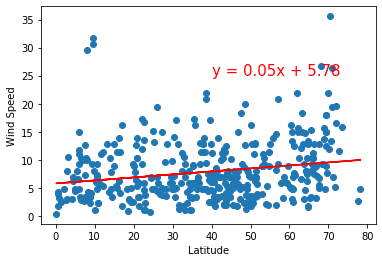

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

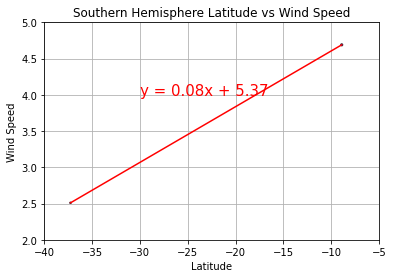

The r-squared is: 1.0


In [60]:
# Southern Hemisphere (greater than or equal to 0 degrees latitude)
x = sh_df['Lat']
y = sh_df["Windspeed"]

# Build a scatter plot for each data type
plt.scatter(x,y, marker="o", facecolors="blue", edgecolors="black", s=sh_df["Windspeed"], alpha=0.75)

plt.xlim(-40,-5)
plt.ylim(2,5)

# Incorporate the other graph properties
plt.title("Southern Hemisphere Latitude vs Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-30,4),fontsize=15,color="red")

# Show plot
plt.show()
print(f"The r-squared is: {rvalue**2}")

In [58]:
correlation = st.pearsonr(x,y)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 1.0


The r-value is: 0.017128274759839232


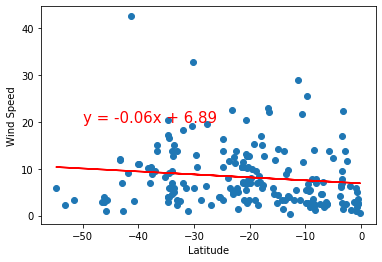